# Flight Price Prediction Model

### Instructions:

- You will haev a dataset.
- Find the cheapest and expensive flights at a specific time.
- You have to go through EDA.
- ML Model.
- Find a sweet spot for a cheap ticket.

- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait instead of buy now, simply because ticket prices are just too high.

- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a sweet-spot Ahmed is hoping to find and maybe he just might find it.This is the problem that you will be tackling in this competition. Can you predict future prices accurately to such a degree that you can now tell Ahmed - with confidence - that he has made the wrong decision.

- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating algorithms.

# 1. Exploratory Data Analysis
We will extract information from our data.

In [112]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import joblib as joblib
import scipy as sp
import statsmodels.api as sm
import pingouin as pg

In [113]:
# Load Dataset

X_train = pd.read_csv("resources/X_train.csv")
y_train = pd.read_csv("resources/y_train.csv")
X_test = pd.read_csv("resources/X_test.csv")


In [114]:
# Check hape of data
X_train.shape

(21776590, 11)

In [115]:
X_train.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69


In [116]:
y_train.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [117]:
# I will take sample out of data

# Merge two datasets to make one dataset

df1 = pd.concat([X_train,y_train],axis=1) # Horizontal stack
df1.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0


In [118]:
# Select 5000 rows from given datasets (X_train,Y_train)
df = df1.sample(5000)

In [119]:
# Save a csv file for train datasets
df.to_csv("resources/sastaticket_train.csv")

In [120]:
# Select 250 rows from given datasets (X_test)
df_test = X_test.sample(250)

In [121]:
# Save a csv file for test datasets
df_test.to_csv("resources/sastaticket_test.csv")

In [122]:
df_test.sample

<bound method NDFrame.sample of                                        f1 f2 f3                         f4  \
144979   2021-09-02 09:33:31.278339+00:00  x  y  2021-09-08 10:00:00+00:00   
334377   2021-09-03 15:43:50.702101+00:00  x  y  2021-09-04 10:00:00+00:00   
3536619  2021-09-22 00:30:56.545570+00:00  x  y  2021-09-28 10:50:00+00:00   
2021276  2021-09-12 17:12:58.846484+00:00  x  y  2021-09-13 13:00:00+00:00   
556838   2021-09-04 19:48:32.441423+00:00  x  y  2021-09-05 17:00:00+00:00   
...                                   ... .. ..                        ...   
1672765  2021-09-10 17:38:18.662450+00:00  x  y  2021-11-14 11:00:00+00:00   
230381   2021-09-02 21:00:16.468869+00:00  x  y  2021-09-05 14:00:00+00:00   
1579080  2021-09-10 07:54:48.249683+00:00  x  y  2021-09-23 11:00:00+00:00   
4506960  2021-09-29 17:09:57.950084+00:00  x  y  2021-11-12 13:00:00+00:00   
4071335  2021-09-26 05:31:50.752243+00:00  x  y  2021-10-22 13:00:00+00:00   

                               

In [123]:
# Check structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 16926576 to 20398173
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  Unnamed: 0  5000 non-null   int64  
 12  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 512.7+ KB


In [124]:
# Check null values
df.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [125]:
# Check summary statistics
df.describe()

,Unnamed: 0,f8,f9,Unnamed: 0,target
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.083486e+07,22.618800,0.940400,1.083486e+07,10052.192600
std,6.267532e+06,8.787089,0.594742,6.267532e+06,3299.857932
min,8.123000e+03,0.000000,0.000000,8.123000e+03,4990.000000
25%,5.415176e+06,20.000000,1.000000,5.415176e+06,7765.000000
50%,1.092792e+07,20.000000,1.000000,1.092792e+07,9280.000000
75%,1.622482e+07,32.000000,1.000000,1.622482e+07,11245.000000
max,2.177410e+07,45.000000,2.000000,2.177410e+07,33720.000000


In [126]:
print(df.columns)

Index(['Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'Unnamed: 0', 'target'],
      dtype='object')


# Feature Engineering

- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number


In [127]:
# Finding unique values in categorical lists
cat_list = ["f2","f3","f6","f8","f9","f10"]

# Unique value in each column
for i in cat_list:
    print(i,df[i].unique())

f2 ['x']
f3 ['y']
f6 ['gamma' 'beta' 'alpha' 'omega']
f8 [20. 15.  0. 35. 40. 32. 45.]
f9 [1 2 0]
f10 ['c-6' 'c-4' 'b-19' 'a-1' 'c-2' 'a-23' 'b-1' 'b-69' 'd-3' 'a-7' 'b-67'
 'b-73' 'a-5' 'a-9' 'b-9' 'd-1' 'd-5' 'b-369' 'b-319']


### I am removing f2,f3 and f10 and unnamed column because we have to focus more on dates and fare.

In [128]:
df.drop(["Unnamed: 0","f2","f3","f10"],axis=1,inplace=True)

In [129]:
# Rename the columns
df = df.rename(columns = {'f1': 'Ticket Purchase Date', 'f4': 'Departure Date', 'f5': 'Arrival Date', 'f6': 'Company name',
                          'f7': 'Refundable ticket', 'f8': 'Baggage weight', 'f9': 'Baggae Quantity'}, inplace = False)

In [130]:
df.head()

,Ticket Purchase Date,Departure Date,Arrival Date,Company name,Refundable ticket,Baggage weight,Baggae Quantity,target
16926576,2021-08-02 21:59:33.226549+00:00,2021-08-08 17:00:00+00:00,2021-08-08 18:59:00+00:00,gamma,True,20.0,1,11045.0
4413240,2021-04-08 17:48:47.144065+00:00,2021-04-10 11:00:00+00:00,2021-04-10 13:00:00+00:00,gamma,True,20.0,2,9650.0
492676,2021-01-14 21:18:11.387249+00:00,2021-02-05 16:00:00+00:00,2021-02-05 17:55:00+00:00,beta,False,20.0,0,8697.0
2342299,2021-02-28 17:10:09.331174+00:00,2021-03-05 05:15:00+00:00,2021-03-05 07:25:00+00:00,alpha,True,15.0,1,7502.0
8625891,2021-06-03 17:37:26.239547+00:00,2021-06-30 05:00:00+00:00,2021-06-30 07:00:00+00:00,gamma,True,20.0,2,11900.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 16926576 to 20398173
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticket Purchase Date  5000 non-null   object 
 1   Departure Date        5000 non-null   object 
 2   Arrival Date          5000 non-null   object 
 3   Company name          5000 non-null   object 
 4   Refundable ticket     5000 non-null   bool   
 5   Baggage weight        5000 non-null   float64
 6   Baggae Quantity       5000 non-null   int64  
 7   target                5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 317.4+ KB


In [132]:
# Convert them into date and time objects
from datetime import date,datetime

df["Ticket Purchase Date"] = pd.to_datetime(df["Ticket Purchase Date"])
df["Departure Date"] = pd.to_datetime(df["Departure Date"])
df["Arrival Date"] = pd.to_datetime(df["Arrival Date"])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 16926576 to 20398173
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Ticket Purchase Date  5000 non-null   datetime64[ns, UTC]
 1   Departure Date        5000 non-null   datetime64[ns, UTC]
 2   Arrival Date          5000 non-null   datetime64[ns, UTC]
 3   Company name          5000 non-null   object             
 4   Refundable ticket     5000 non-null   bool               
 5   Baggage weight        5000 non-null   float64            
 6   Baggae Quantity       5000 non-null   int64              
 7   target                5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 317.4+ KB


In [134]:
df.insert(0, "booking_and_departure_time _difference",((df["Departure Date"]-df["Ticket Purchase Date"]).astype("timedelta64[s]")),True)
df.insert(1, "flight_duration_in_air",((df["Arrival Date"]-df["Departure Date"]).astype("timedelta64[s]")),True)

In [135]:
df.head()

,booking_and_departure_time _difference,flight_duration_in_air,Ticket Purchase Date,Departure Date,Arrival Date,Company name,Refundable ticket,Baggage weight,Baggae Quantity,target
16926576,500426.0,7140.0,2021-08-02 21:59:33.226549+00:00,2021-08-08 17:00:00+00:00,2021-08-08 18:59:00+00:00,gamma,True,20.0,1,11045.0
4413240,148272.0,7200.0,2021-04-08 17:48:47.144065+00:00,2021-04-10 11:00:00+00:00,2021-04-10 13:00:00+00:00,gamma,True,20.0,2,9650.0
492676,1881708.0,6900.0,2021-01-14 21:18:11.387249+00:00,2021-02-05 16:00:00+00:00,2021-02-05 17:55:00+00:00,beta,False,20.0,0,8697.0
2342299,389090.0,7800.0,2021-02-28 17:10:09.331174+00:00,2021-03-05 05:15:00+00:00,2021-03-05 07:25:00+00:00,alpha,True,15.0,1,7502.0
8625891,2287353.0,7200.0,2021-06-03 17:37:26.239547+00:00,2021-06-30 05:00:00+00:00,2021-06-30 07:00:00+00:00,gamma,True,20.0,2,11900.0


In [136]:
df.isnull().sum()

booking_and_departure_time _difference    0
flight_duration_in_air                    0
Ticket Purchase Date                      0
Departure Date                            0
Arrival Date                              0
Company name                              0
Refundable ticket                         0
Baggage weight                            0
Baggae Quantity                           0
target                                    0
dtype: int64

In [137]:
cat_cols = ["Company name","Refundable ticket","Baggage weight","Baggae Quantity"]
num_cols = ["booking_and_departure_time _difference","flight_duration_in_air"]

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:

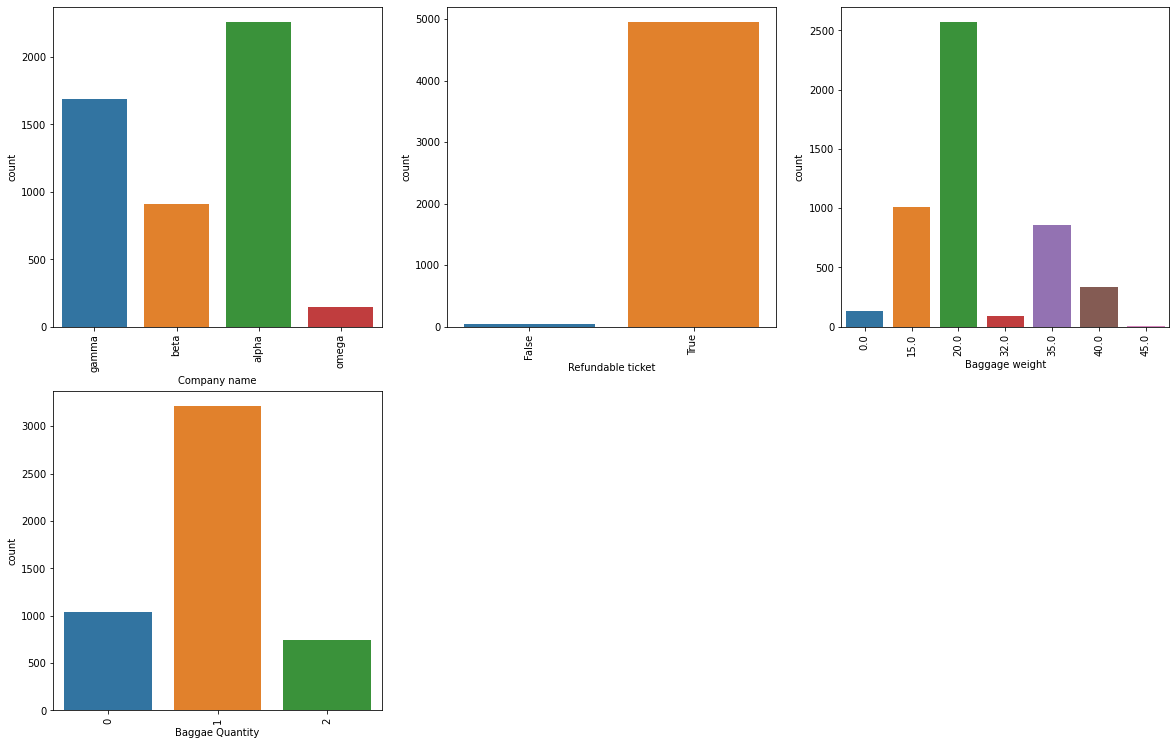

In [138]:
# Plotting categorical data

c=1
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(3,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    c=c+1
plt.show()

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


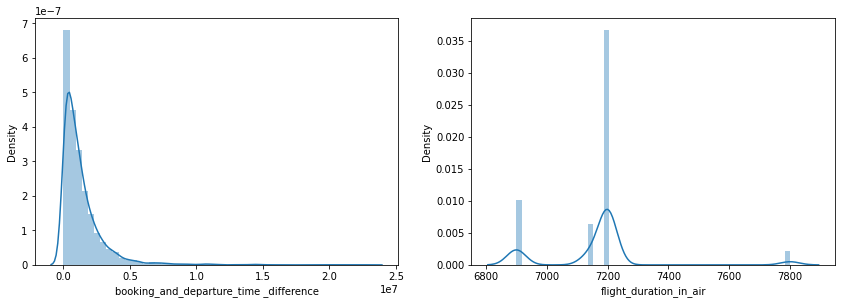

In [139]:
# Plotting categorical data

c=1
plt.figure(figsize=(30,10))
for i in num_cols:
    plt.subplot(2,4,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


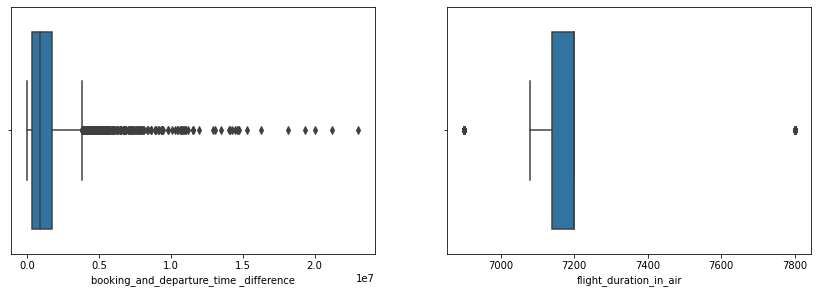

In [140]:
# Plotting categorical data

c=1
plt.figure(figsize=(30,10))
for i in num_cols:
    plt.subplot(2,4,c)
    sns.boxplot(df[i])
    c=c+1
plt.show()

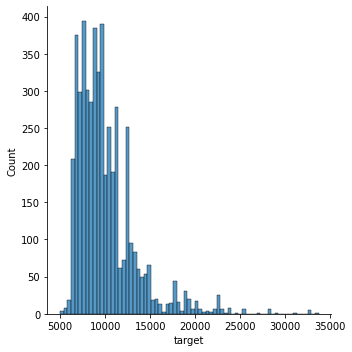

In [141]:
# Target

sns.displot(df["target"])

C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

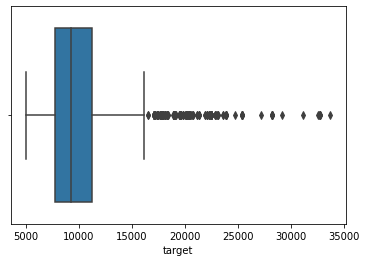

In [142]:
# Target

sns.boxplot(df["target"])

In [143]:
df.skew()

C:\Users\AsJad\AppData\Local\Temp\ipykernel_4088\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


booking_and_departure_time _difference    4.153372
flight_duration_in_air                    1.364926
Refundable ticket                        -9.752260
Baggage weight                            0.446654
Baggae Quantity                           0.018283
target                                    2.080814
dtype: float64

In [144]:
df.kurtosis()

C:\Users\AsJad\AppData\Local\Temp\ipykernel_4088\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


booking_and_departure_time _difference    28.923054
flight_duration_in_air                     5.446825
Refundable ticket                         93.143838
Baggage weight                             0.025564
Baggae Quantity                           -0.195962
target                                     6.759530
dtype: float64

In [145]:
# Remove outliers

# Encoding Of variables

In [146]:
df.drop(["Ticket Purchase Date","Departure Date","Arrival Date"],axis=1,inplace=True)

In [147]:
df.head()

,booking_and_departure_time _difference,flight_duration_in_air,Company name,Refundable ticket,Baggage weight,Baggae Quantity,target
16926576,500426.0,7140.0,gamma,True,20.0,1,11045.0
4413240,148272.0,7200.0,gamma,True,20.0,2,9650.0
492676,1881708.0,6900.0,beta,False,20.0,0,8697.0
2342299,389090.0,7800.0,alpha,True,15.0,1,7502.0
8625891,2287353.0,7200.0,gamma,True,20.0,2,11900.0


To convert Column values into numerical 0,1,2..

In [148]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [149]:
# Apply label Encoder

df["Company name"] = le.fit_transform(df["Company name"])
df["Refundable ticket"] = le.fit_transform(df["Refundable ticket"])
df["Baggage weight"] = le.fit_transform(df["Baggage weight"])


In [150]:
df.sample(10)

,booking_and_departure_time _difference,flight_duration_in_air,Company name,Refundable ticket,Baggage weight,Baggae Quantity,target
2312844,1301393.0,7200.0,2,1,2,1,7390.0
17874455,868075.0,7200.0,0,1,2,1,8381.0
7697330,607957.0,7200.0,2,1,2,2,9025.0
18032855,832684.0,7200.0,2,1,2,1,7765.0
5799966,618588.0,7140.0,2,1,2,1,7640.0
17113180,350741.0,7200.0,0,1,2,1,10545.0
572990,2166429.0,6900.0,1,1,2,0,8697.0
20132025,438054.0,6900.0,1,1,5,0,13350.0
20131879,682874.0,7200.0,0,1,2,1,10545.0
2762561,114219.0,7200.0,0,1,4,1,9235.0


In [151]:
# To scale/Normalize our data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# df["booking_and_departure_time _difference"]=sc.fit_transform(df["booking_and_departure_time _difference"])
# df["flight_duration_in_air"]=sc.fit_transform(df["flight_duration_in_aire"])
# df["target"]=sc.fit_transform(df["target"])


# Machine Learning Modelling

In [152]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [153]:
# Regression pipelines or algos

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Root mean sqaure error
# rms = mean_absolute_error(y_test,y_pred,squared=False)


In [154]:
# Shorten the names

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [155]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Model loop

for i in [lr,dt,svr,knn]:
    i.fit(X_train,y_train) # fitting our model
    pred = i.predict(X_test) # predict
    test_score = r2_score(y_test,pred) # test score
    train_score = r2_score(y_train,i.predict(X_train)) # train score
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("r2 score is: ",r2_score(y_test,pred))
        print("Mean Absolute Error is: ",mean_absolute_error(y_test,pred))
        print("Mean Squarred Error is: ",mean_squared_error(y_test,pred))
        print("RMSE is: ",mean_squared_error(y_test,pred,squared = False))
        print("--------------------------------------------------------")

# To save predictions

res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("resources/prediction_results_with_train_test_split.csv")

LinearRegression()
r2 score is:  0.10269067134868615
Mean Absolute Error is:  2118.9491700848503
Mean Squarred Error is:  8457782.315365491
RMSE is:  2908.226661621389
--------------------------------------------------------


C:\Users\AsJad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()
r2 score is:  -0.029634803715919755
Mean Absolute Error is:  2169.0431016732437
Mean Squarred Error is:  9705044.577261204
RMSE is:  3115.2920532850853
--------------------------------------------------------


In [157]:
# Fitting Linear Regression to the Training set
# lr = LinearRegression().fit(X,y)
# lr.predict(df_test)

In [161]:
# Function to calculate time

def convert (seconds):
    seconds = seconds % (24*3600)
    hours = seconds // 3600
    seconds %=3600
    minutes = seconds //60
    seconds %= 60
    return "%d:%02d:%02d" % (hours,minutes,seconds)

# column addition

df["time_1"] = df ["booking_and_departure_time _difference"].apply(convert)
df["time_2"] = df ["flight_duration_in_air"].apply(convert)
df.sample(100)


,booking_and_departure_time _difference,flight_duration_in_air,Company name,Refundable ticket,Baggage weight,Baggae Quantity,target,time_1,time_2
16044255,492015.0,7200.0,0,1,1,1,12945.0,16:40:15,2:00:00
8463882,3212012.0,7200.0,0,1,4,1,9707.0,4:13:32,2:00:00
10308205,444083.0,7200.0,0,1,1,1,6531.0,3:21:23,2:00:00
12440853,535524.0,7200.0,0,1,1,1,9045.0,4:45:24,2:00:00
17651589,307295.0,7200.0,2,1,2,1,7500.0,13:21:35,2:00:00
...,...,...,...,...,...,...,...,...,...
14584286,1958077.0,7200.0,0,1,4,1,10545.0,15:54:37,2:00:00
353060,333733.0,6900.0,1,0,2,0,8697.0,20:42:13,1:55:00
19984366,5693748.0,7200.0,2,1,2,1,6870.0,21:35:48,2:00:00
18813728,728471.0,7200.0,3,1,2,1,16500.0,10:21:11,2:00:00


In [163]:
df["time_1"].max()

'9:59:46'

# Some extra Methods

In [159]:
date_format_str = "%Y/%m/%d %H:%M:%S.%f"

df1["f1"] = pd.to_datetime(df1["f1"])
df1["f4"] = pd.to_datetime(df1["f4"])

f1 = pd.to_datetime(df1["f1"],date_format_str)
f4 = pd.to_datetime(df1["f4"],date_format_str)

diff = f4-f1
df1['delta'] = diff

In [160]:
df1.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target,delta
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0,9 days 19:13:42.536998
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0,9 days 19:13:42.536998
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0,10 days 01:13:42.536998
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0,10 days 01:13:42.536998
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0,25 days 01:13:41.808881
